In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230408114323762483'

In [2]:
import torch
import numpy
import matplotlib.pyplot
from IPython import display

In [13]:
matplotlib.pyplot.style.use('ggplot')

# Binary Classification with Neural Nets

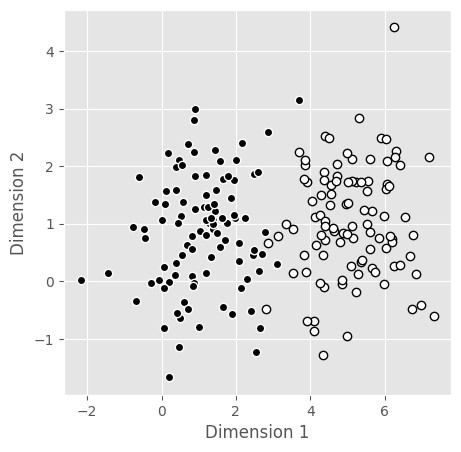

In [15]:
# generate data

nPeClust = 100
blur = 1

A = [ 1,1 ]
B = [ 5,1 ]

# generate data
a = [A[0]+numpy.random.randn(nPeClust)*blur,A[1]+numpy.random.randn(nPeClust)*blur]
b = [B[0]+numpy.random.randn(nPeClust)*blur,B[1]+numpy.random.randn(nPeClust)*blur]

# true labels
labels_np = numpy.vstack((numpy.zeros((nPeClust,1)),numpy.ones((nPeClust,1))))

# concatanate into a matrix

data_np = numpy.hstack((a,b)).T

# convert to pytorch tenors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# plot the data 

fig = matplotlib.pyplot.figure(figsize=(5,5))
matplotlib.pyplot.plot(data[numpy.where(labels==0)[0],0],data[numpy.where(labels==0)[0],1],'wo',markerfacecolor='black')
matplotlib.pyplot.plot(data[numpy.where(labels==1)[0],0],data[numpy.where(labels==1)[0],1],'ko',markerfacecolor='white')
matplotlib.pyplot.xlabel('Dimension 1')
matplotlib.pyplot.ylabel('Dimension 2')
matplotlib.pyplot.show()

In [17]:
nnClassifier = torch.nn.Sequential(
    torch.nn.Linear(2,1),
    torch.nn.ReLU6(),
    torch.nn.Linear(1,1),
    torch.nn.Sigmoid(),)

In [18]:
# other parameters

lr = .01

lossfun = torch.nn.BCELoss()

# optimizer 
optimizer = torch.optim.SGD(nnClassifier.parameters(),lr=lr)

In [36]:
epochs = 1000
losses = torch.zeros(epochs)

for i in range(epochs):
    pred = nnClassifier(data)
    
    loss = lossfun(pred,labels)
    losses[i] = loss
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

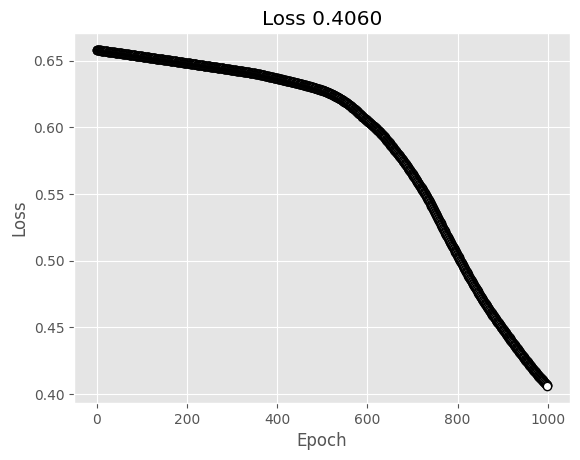

In [40]:
# losses
matplotlib.pyplot.plot(losses.detach(),'ko',markerfacecolor='w')
matplotlib.pyplot.title(f'Loss {min(losses.detach()):.4f}')
matplotlib.pyplot.xlabel('Epoch')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.show()

In [38]:
# Prediction
predictions = nnClassifier(data)

predlabels = predictions>.5

misclassified = numpy.where(predlabels!=labels)[0]

#total accuracy
totalacc = 100-100*len(misclassified)/(2*nPeClust)

print('Final Accuracy %s' %totalacc)

Final Accuracy 97.0


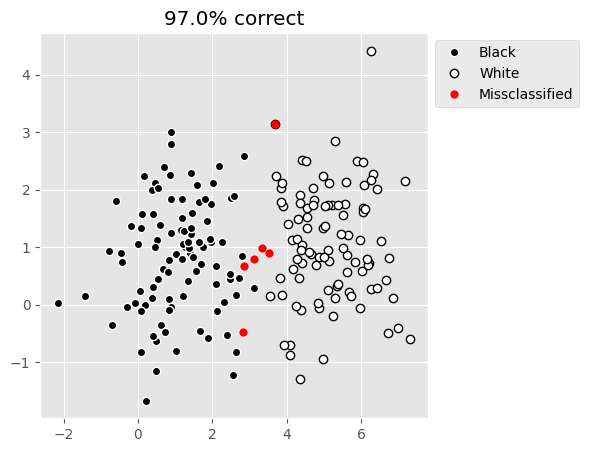

In [41]:
# plot the labeled data

fig = matplotlib.pyplot.figure(figsize=(5,5))
matplotlib.pyplot.plot(data[numpy.where(~predlabels)[0],0],data[numpy.where(~predlabels)[0],1],'wo',markerfacecolor='black')
matplotlib.pyplot.plot(data[numpy.where(predlabels)[0],0],data[numpy.where(predlabels)[0],1],'ko',markerfacecolor='white')
matplotlib.pyplot.plot(data[misclassified,0],data[misclassified,1],'ro',markersize=5)

matplotlib.pyplot.legend(['Black','White','Missclassified'],bbox_to_anchor=(1,1))
matplotlib.pyplot.title(f'{totalacc}% correct')
matplotlib.pyplot.show()